<a href="https://colab.research.google.com/github/janko0823/2020-2-AI/blob/master/code/05_mnist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential ([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(10, activation='softmax')                 
])
  
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9579
Epoch 3/5
1875/1875 [======================

[0.07848846167325974, 0.977400004863739]

In [55]:
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[4.4746130e-08 4.9166044e-08 4.2344068e-06 1.4227693e-04 1.1461370e-09
  1.1249128e-08 4.2841483e-14 9.9979919e-01 2.1474918e-06 5.1919127e-05]]
[4.4746130e-08 4.9166044e-08 4.2344068e-06 1.4227693e-04 1.1461370e-09
 1.1249128e-08 4.2841483e-14 9.9979919e-01 2.1474918e-06 5.1919127e-05]


In [56]:
import numpy as np

one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())
print(tf.argmax(one_pred).numpy())

tf.Tensor(0.9999999, shape=(), dtype=float32)
0.9999999
7


In [57]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

0.9999999
7


In [58]:
import numpy as np

print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [59]:
import numpy as np

print(tf.argmax([5, 4, 10, 1, 2]))
print(tf.argmax([3, 1, 4, 9, 6, 7, 2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


0.9999999
7


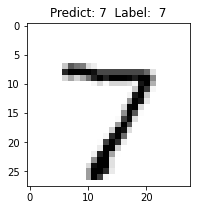

In [60]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
tmp = "Predict: " + str(one) + "  Label:  " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Greys')

In [61]:
import numpy as np

x= np.array([2, 3, 254, 5, 6, 3])
x = x / 255.0
print(x)

x= x.reshape(2, 3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [62]:
data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [63]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3, input_shape=(2,))
outputs = layer(data, training=True)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [64]:
from random import sample
import numpy as np

pred_result = model.predict (x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

pred_labels = np.argmax(pred_result, axis=1)
print(pred_labels)
print(y_test)

(10000, 10)
[4.4746045e-08 4.9166044e-08 4.2344027e-06 1.4227678e-04 1.1461347e-09
 1.1249128e-08 4.2841398e-14 9.9979919e-01 2.1474898e-06 5.1919080e-05]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


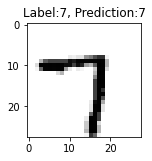

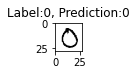

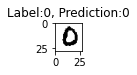

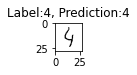

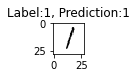

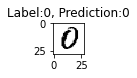

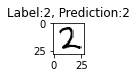

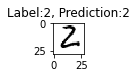

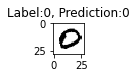

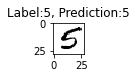

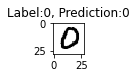

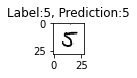

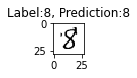

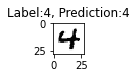

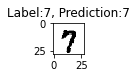

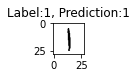

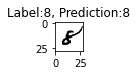

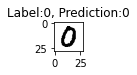

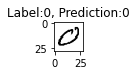

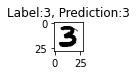

In [65]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)
pred_labels = np.argmax(pred_result, axis=1)
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)), nrows * ncols))

count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot (nrows, ncols, count)
    cmap = 'Greys' if ( pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)
  
    plt.tight_layout()
    plt.show()

In [66]:
from random import sample
import numpy as np

mispred = []
pred_result = model.predict(x_test)
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
    if pred_labels[n] != y_test[n]:
      mispred.append(n)
print('정답이 틀린 수', len(mispred))
samples = sample(mispred, 20)
print(samples)

정답이 틀린 수 226
[3769, 2182, 5972, 3567, 3520, 5331, 4497, 1319, 2016, 9587, 613, 2052, 2329, 691, 5937, 151, 340, 2098, 5734, 2939]


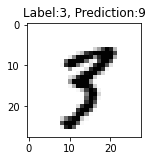

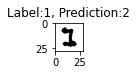

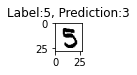

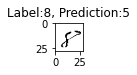

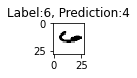

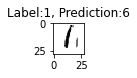

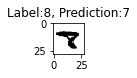

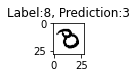

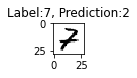

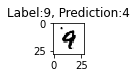

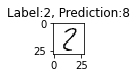

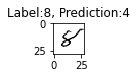

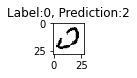

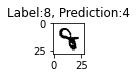

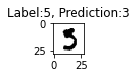

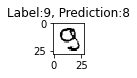

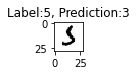

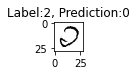

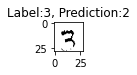

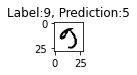

In [67]:
count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot (nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)
  
    plt.tight_layout()
    plt.show()

정답이 틀린 수 226
[9779, 2098, 846, 1260, 4601, 4065, 2422, 877, 7434, 9941, 4861, 2070, 2272, 9808, 2488, 684, 5600, 3681, 6571, 1039]


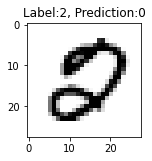

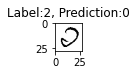

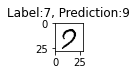

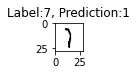

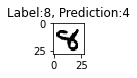

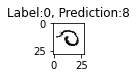

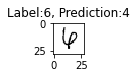

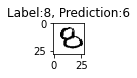

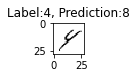

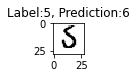

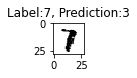

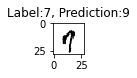

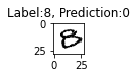

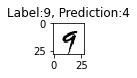

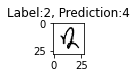

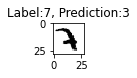

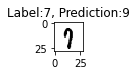

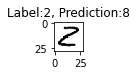

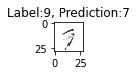

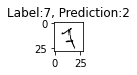

In [68]:
from random import sample
import numpy as np

mispred = []
pred_result = model.predict(x_test)
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
    if pred_labels[n] != y_test[n]:
      mispred.append(n)
print('정답이 틀린 수', len(mispred))
samples = sample(mispred, 20)
print(samples)

count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot (nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)
  
    plt.tight_layout()
    plt.show()

In [69]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential ([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(10, activation='softmax')                 
])
  
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_______________________________________________

[0.08019966632127762, 0.9767000079154968]

In [70]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential ([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(10, activation='softmax')                 
])
  
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9575
Epoch 3/5
1875/1875 [======================

[0.07731490582227707, 0.9761999845504761]

In [71]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

model = tf.keras.models.Sequential ([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')                 
])
model.summary()
  
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1459 - accuracy: 0.9567
Epoch 3/5
1875/1875 [======================

[0.08120589703321457, 0.9757999777793884]